In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=76f458a5ab89ba147c9b3d3d6fc53dd0aa3bfdfb3f64badf66198240b6e4a9d7
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import umap

In [15]:
data = tf.keras.datasets.mnist

# Extract: training_images & training_labels are NumPy arrays
(train_features, training_labels), (test_features, test_labels) = data.load_data()

print(train_features.shape)
print(test_features.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
features = test_features.reshape(test_features.shape[0], -1)

print(features.shape) # flatting

(10000, 784)


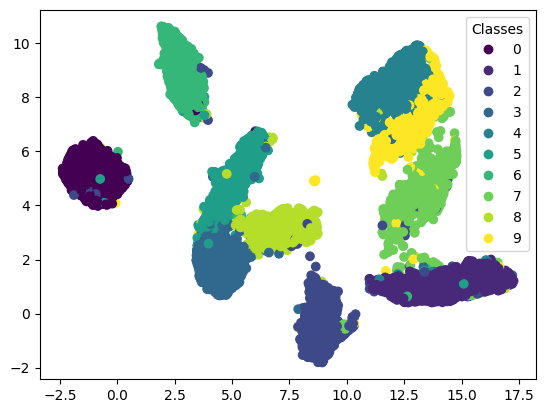

In [13]:
reducer = umap.UMAP(n_components=2)
features_umap = reducer.fit_transform(features)

_, ax = plt.subplots()
scatter = ax.scatter(features_umap[:, 0], features_umap[:, 1], c=test_labels)
_ = ax.legend(
    scatter.legend_elements()[0], list(range(10)), loc="upper right", title="Classes"
)

In [16]:
def draw_umap(n_neighbors=15, min_dist=0.1, metric='euclidean', title=''):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, metric=metric)

    features_umap = reducer.fit_transform(features)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(features_umap[:,0], features_umap[:,1], c=test_labels)
    plt.title(title, fontsize=18)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling bac

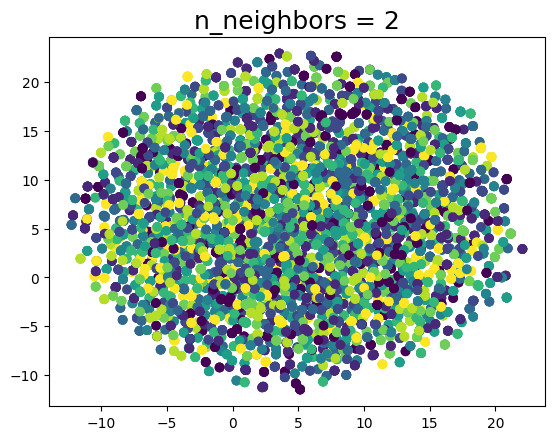

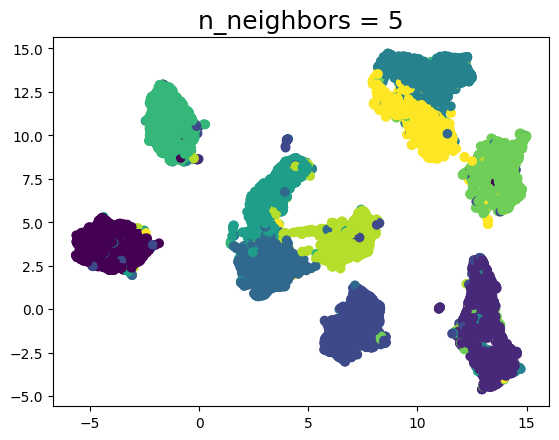

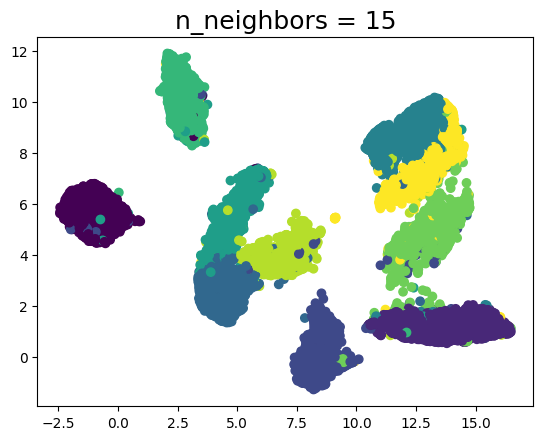

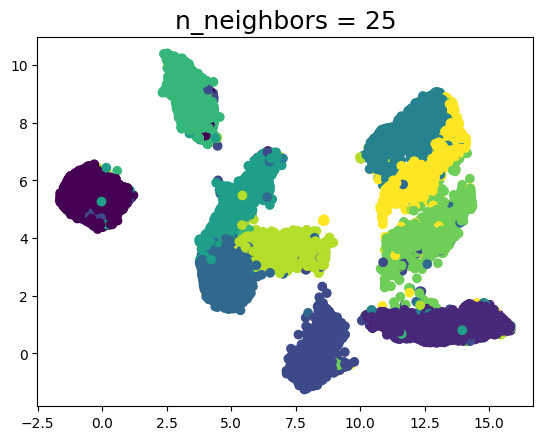

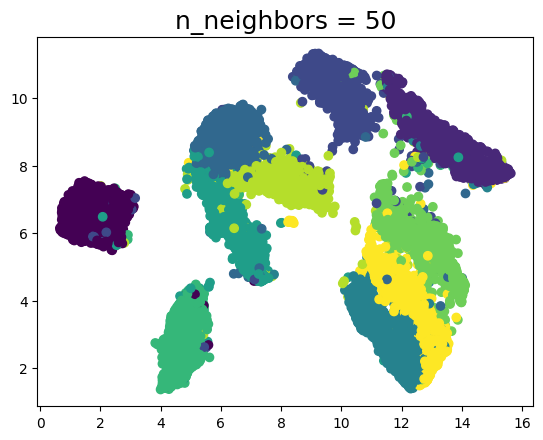

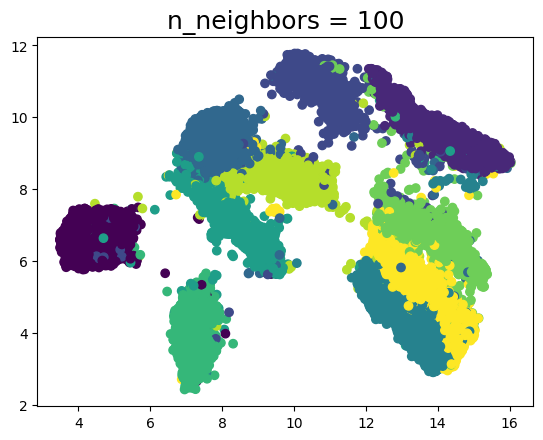

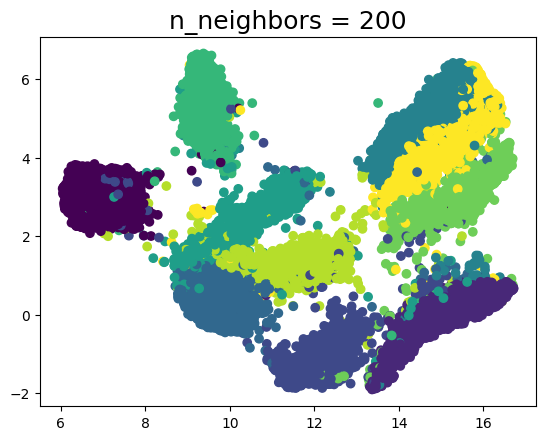

In [19]:
for n in (2, 5, 15, 25, 50, 100, 200):
    draw_umap(n_neighbors=n, title=f'n_neighbors = {n}')